# Business Understanding

 An estimated 45.2 million Americans plan to wager on the NFL season in some form, up 36% from last year, according to research from the American Gaming Association. At least 

12 billion will be bet on the NFL this season, according to sports betting market tracker PlayUSA.

https://www.cnbc.com/2021/09/09/more-americans-will-wager-on-the-nfl-as-the-league-embraces-betting.html

 With all of this money is there a sure way to predict something in NFL Betting Called the Over_Under_Line

Many Individuals across the United States Are looking to achieve a guaranteed way to passive income. The individuals want to know if it is sustainabe or possible to accuratley bet the over under line in all NFL games.

## Stake Holders 
here would be anyone looking to achieve a passive secondary income at a consistent rate throughout the NFL Season
### The Problem 
They aren't sure if there is an algorithm that can accurately predict the over under line in football so they aren't sure when and where to beet and on what games

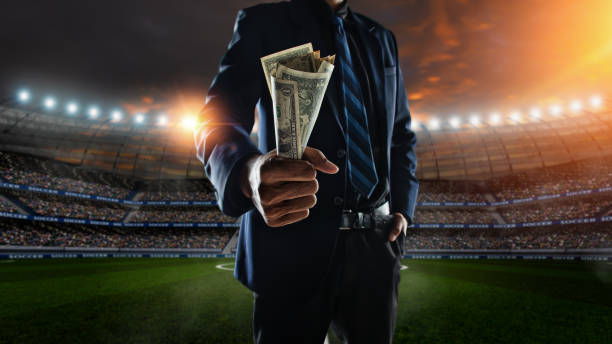

In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import datetime
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    import sklearn

# required machine learning packages
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.metrics import brier_score_loss, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.calibration import CalibratedClassifierCV as CCV

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
spread = pd.read_csv('data/spreadspoke_scores.csv')
spread

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


## The Data
The data comes from a dataset that can be found here:https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data

#### Teams
The Data Set Entitled Teams contains columns consisting of team_name -Names of NFL Teams team_name_short -Team Names without the City/State team_id - Abreviation of NFL Teams team_id_pfr -Abreviation of NFL Teams team_conference -Conference that the NFL Team is in team_division - Division That the NFL Team is in team_conference_pre2002 - Conference Prior to 2002 team_division_pre2002- Divisions Prior to 2002

#### Stadiums
The Data set entitled Stadiums consists of a bunch of stadium inforatio about where the NFL team plays I will not be utilizing this data set initailly as I don't believe it plays a huge role in the over_under_target stadium_name
stadium_location
stadium_open
stadium_close
stadium_type
stadium_address
stadium_weather_station_code
stadium_weather_type
stadium_capacity
stadium_surface STATION NAME
LATITUDE
LONGITUDE
LEVATION

#### Spread
The Data set entitled Spread will be my priority data set. The Target variabl is located on this data set as well as key informatioin from the previously mentioned data sets are on this data set as well. schedule_date
schedule_season schedule_week
schedule_playoff
team_home
score_home
score_away
team_away
team_favorite_id
spread_favorite
over_under_line
stadium stadium_neutral
weather_temperature weather_wind_mph
weather_humidity
weather_detail

<AxesSubplot:>

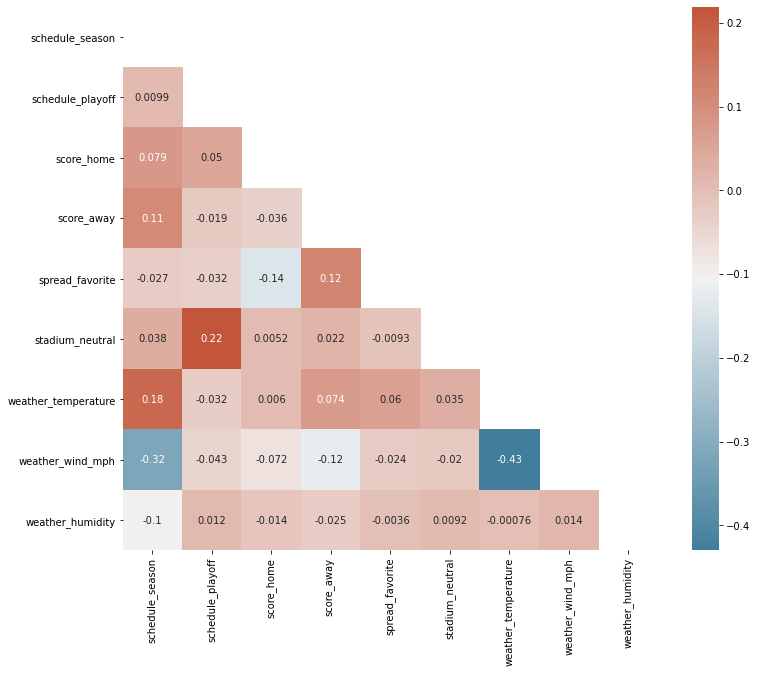

In [6]:
corr = spread.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)